In [1]:
# hide
# default_exp model_fitting

from nbdev.showdoc import *

# InstanceCMR - Single List Length
Now that relevant dependencies are specified and testing, we'll jump right into fitting the model to larger portions of the dataset. This time, we'll do the entire 20-item list length subset of the Murdock (1962) dataset.

## Load Data

In [2]:
from instance_cmr.datasets import prepare_murddata
from instance_cmr.model_fitting import icmr_murd_likelihood
from instance_cmr.model_fitting import icmr_murd_objective_function
from instance_cmr.model_fitting import visualize_fit
from instance_cmr.models import InstanceCMR

murd_trials0, murd_events0, murd_length0 = prepare_murddata(
    '../../../data/MurdData_clean.mat', 0)

murd_events0.head()

,subject,list,item,input,output,study,recall,repeat,intrusion
0,1,1,1,1,5.0,True,True,0,False
1,1,1,2,2,7.0,True,True,0,False
2,1,1,3,3,NaN,True,False,0,False
3,1,1,4,4,NaN,True,False,0,False
4,1,1,5,5,NaN,True,False,0,False


## Free Echo-Based Sensitivity

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'choice_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'feature_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 21079.43935271875
     jac: array([  0.07748895,   3.22615961,  -0.71813701,  -0.68321242,
        -1.79716152,   0.49112714,  -0.78653095,   0.        ,
       -32.81020326, -16.64593584,  -0.38271537])
 message: 'Optimization terminated successfully.'
    nfev: 12081
     nit: 60
 success: True
       x: array([7.35396287e-01, 1.87003498e-02, 9.02468034e-01, 4.02430122e-03,
       1.00000000e+00, 1.10964824e-01, 1.01153545e+01, 7.00452937e+01,
       3.45770082e-02, 2.57315752e-01, 1.27029929e+00])
```

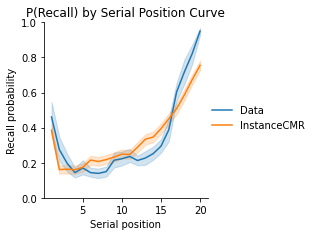

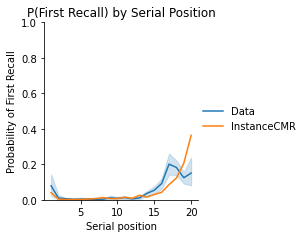

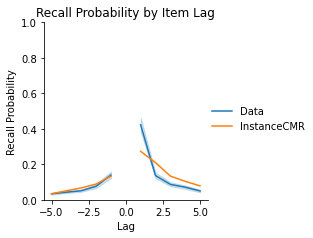

In [4]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'feature_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

## Free C-F Trace-Based Sensitivity

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'feature_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'context_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 21073.071051444465
     jac: array([ 6.78082866, 15.58983058,  2.69428709, 20.38614184, -3.04062267,
       -1.71930879, -0.10331859,  0.        , -7.69286998, -7.72306521,
        1.26165104])
 message: 'Optimization terminated successfully.'
    nfev: 16443
     nit: 86
 success: True
       x: array([7.90931647e-01, 7.87233205e-03, 9.48041056e-01, 8.09406715e-04,
       8.11152335e-01, 6.66612122e-02, 2.08401190e+01, 8.51443053e+01,
       2.86499753e-02, 2.92199457e-01, 8.44628821e-01])
```

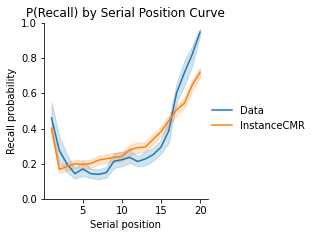

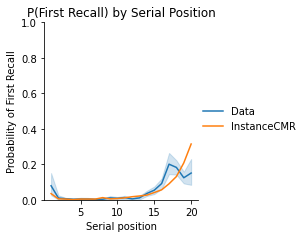

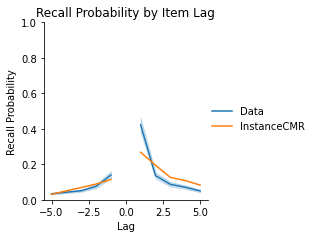

In [9]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'context_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)

## Single-Parameter Free Trace-Based Sensitivity

We want to make sure any difference between the trace-based and echo-based sensitivity parameters aren't because the former is responsible for both C->F and F->C transformations. Currently, when feature_sensitivity is held to 1.0, context_sensitivity organizes trace-based retrieval in either direction.

In [ ]:
from scipy.optimize import differential_evolution
from numba.typed import List
import numpy as np

free_parameters = [
    'encoding_drift_rate',
    'start_drift_rate',
    'recall_drift_rate',
    'shared_support',
    'item_support',
    'learning_rate',
    'primacy_scale',
    'primacy_decay',
    'stop_probability_scale',
    'stop_probability_growth',
    'context_sensitivity']

lb = np.finfo(float).eps
ub = 1-np.finfo(float).eps

bounds = [
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, ub),
    (lb, 100),
    (lb, 100),
    (lb, ub),
    (lb, 10),
    (lb, 10)
]

# cost function to be minimized
# ours scales inversely with the probability that the data could have been 
# generated using the specified parameters and our model
cost_function = icmr_murd_objective_function(
    List([murd_trials0]), 
    {'item_counts': List([murd_length0]), 'feature_sensitivity': 1, 'choice_sensitivity': 1}, 
    free_parameters)

result = differential_evolution(cost_function, bounds, disp=True)
print(result)

## Results
```
     fun: 21094.09681817264
     jac: array([ 12.23052089, -21.23088052,  12.16540107,   9.48493835,
        -4.64242476,  -7.4684067 ,  -3.32292986,   0.        ,
       -22.60858309,  11.04235708,   1.48029359])
 message: 'Optimization terminated successfully.'
    nfev: 14109
     nit: 64
 success: True
       x: array([7.50643542e-01, 1.42483068e-02, 8.99035619e-01, 9.60870298e-04,
       2.30959697e-01, 9.61676960e-02, 7.80989503e+00, 6.29317080e+01,
       3.44289419e-02, 2.57667853e-01, 1.20133645e+00])
```

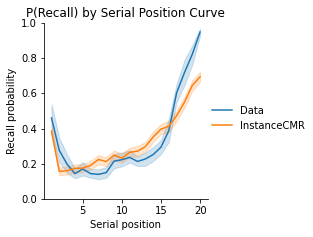

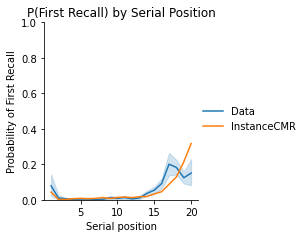

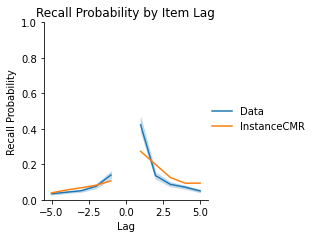

In [5]:
parameters = {
    'item_count':murd_length0,
    'presentation_count': murd_length0,
    'feature_sensitivity': 1,
    'choice_sensitivity': 1
}

visualize_fit(InstanceCMR, 
              {**parameters, 
               **{free_parameters[i]:result.x[i] for i in range(len(result.x))}}, 
              murd_events0, 'subject > -1', experiment_count=1000, savefig=True)